In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("student_dataset.csv")

In [3]:
df.head()

,Student_ID,Age,Gender,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA,Family_Income,Part_Time_Job,Final_Score
0,1,24,Female,3.6,55.1,7.58,67280,Yes,94.2
1,2,21,Female,6.2,83.2,6.61,99459,No,88.5
2,3,22,Male,2.2,50.3,8.98,36779,No,96.7
3,4,24,Female,1.1,58.0,6.35,83932,No,82.2
4,5,20,Male,2.7,77.4,7.19,92936,No,74.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         100 non-null    int64  
 1   Age                100 non-null    int64  
 2   Gender             100 non-null    object 
 3   Hours_Studied      100 non-null    float64
 4   Attendance_Rate    100 non-null    float64
 5   Previous_Sem_CGPA  100 non-null    float64
 6   Family_Income      100 non-null    int64  
 7   Part_Time_Job      100 non-null    object 
 8   Final_Score        100 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Student_ID,Age,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA,Family_Income,Final_Score
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,50.500000,21.210000,4.214000,76.41500,7.459900,81902.370000,67.907000
std,29.011492,1.913773,2.224293,14.43588,1.477141,35735.329886,19.655468
min,1.000000,18.000000,0.600000,50.30000,5.070000,21062.000000,35.900000
25%,25.750000,19.750000,2.300000,64.60000,6.247500,48019.250000,49.625000
50%,50.500000,21.000000,4.300000,78.10000,7.490000,81888.500000,67.000000
75%,75.250000,23.000000,6.225000,87.60000,8.750000,109449.250000,86.350000
max,100.000000,24.000000,7.900000,99.50000,9.950000,146174.000000,100.000000


In [6]:
df["Result"] = df["Final_Score"].apply(lambda x: "Pass" if x >= 40 else "Fail")

In [7]:
df.head()

,Student_ID,Age,Gender,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA,Family_Income,Part_Time_Job,Final_Score,Result
0,1,24,Female,3.6,55.1,7.58,67280,Yes,94.2,Pass
1,2,21,Female,6.2,83.2,6.61,99459,No,88.5,Pass
2,3,22,Male,2.2,50.3,8.98,36779,No,96.7,Pass
3,4,24,Female,1.1,58.0,6.35,83932,No,82.2,Pass
4,5,20,Male,2.7,77.4,7.19,92936,No,74.9,Pass


In [8]:
df["Result"] = df["Result"].map({"Pass": 1, "Fail": 0})

In [9]:
feature_df=df[["Hours_Studied", "Attendance_Rate","Previous_Sem_CGPA"]]
target_df=df["Result"]

In [10]:
X=feature_df
print(X)

    Hours_Studied  Attendance_Rate  Previous_Sem_CGPA
0             3.6             55.1               7.58
1             6.2             83.2               6.61
2             2.2             50.3               8.98
3             1.1             58.0               6.35
4             2.7             77.4               7.19
..            ...              ...                ...
95            1.1             76.6               9.51
96            1.7             77.0               7.53
97            7.2             81.9               9.13
98            5.0             86.3               6.60
99            0.6             98.8               9.48

[100 rows x 3 columns]


In [11]:
#20% test 80 %train
x_train,x_test,y_train,y_test=train_test_split(feature_df,target_df,test_size=0.2,random_state=42)

In [12]:
print(x_test.values)

[[ 2.3  79.5   9.03]
 [ 6.   54.9   7.88]
 [ 5.7  89.9   9.22]
 [ 2.3  69.3   9.28]
 [ 7.3  64.7   7.52]
 [ 0.8  96.4   8.08]
 [ 0.6  94.6   7.1 ]
 [ 6.6  73.3   6.41]
 [ 6.5  66.3   7.04]
 [ 3.6  55.1   7.58]
 [ 2.2  63.3   9.77]
 [ 4.4  64.    9.28]
 [ 1.5  89.8   6.41]
 [ 7.8  58.9   5.49]
 [ 5.9  88.5   9.29]
 [ 2.7  77.4   7.19]
 [ 7.4  68.8   8.14]
 [ 7.1  54.7   9.39]
 [ 7.2  82.5   5.78]
 [ 5.8  51.2   8.52]]


In [13]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [15]:
print(y_test)

83    1
53    1
70    1
45    1
44    1
39    1
22    0
80    0
10    1
0     1
18    1
30    1
73    1
33    1
90    1
4     1
76    1
77    1
12    1
31    1
Name: Result, dtype: int64


In [16]:
#Classification
#NOT THIS BUT ACCURACY
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# y_test = actual labels
# y_pred = predicted labels (as 0/1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Mean Squared Error: 0.1
R-squared: -0.11111111111111094
Accuracy: 0.9


In [17]:
y_pred_labels = (y_pred >= 0.5).astype(int) 

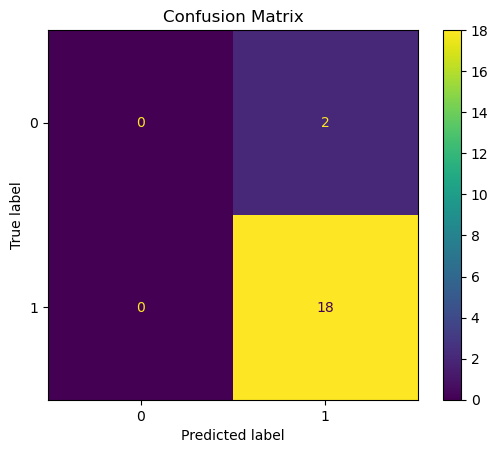

In [18]:
cm = confusion_matrix(y_test, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 
plt.title("Confusion Matrix")
plt.show()

In [19]:
print(cm)

[[ 0  2]
 [ 0 18]]


In [20]:
df['Grade'] = df['Final_Score'].apply(lambda x: 'A' if x >= 85 else 'B' if x >= 70 else 'C' if x >= 50 else 'D')

In [21]:
df.head()

,Student_ID,Age,Gender,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA,Family_Income,Part_Time_Job,Final_Score,Result,Grade
0,1,24,Female,3.6,55.1,7.58,67280,Yes,94.2,1,A
1,2,21,Female,6.2,83.2,6.61,99459,No,88.5,1,A
2,3,22,Male,2.2,50.3,8.98,36779,No,96.7,1,A
3,4,24,Female,1.1,58.0,6.35,83932,No,82.2,1,B
4,5,20,Male,2.7,77.4,7.19,92936,No,74.9,1,B


In [22]:
feature_df=df[["Hours_Studied", "Attendance_Rate","Previous_Sem_CGPA","Final_Score"]]
target_df=df["Grade"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.2, random_state=42)

In [24]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = model.predict(X_test)

In [26]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00         5
           B       1.00      1.00      1.00         3
           C       1.00      1.00      1.00         7
           D       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


[[5 0 0 0]
 [0 3 0 0]
 [0 0 7 0]
 [0 0 0 5]]


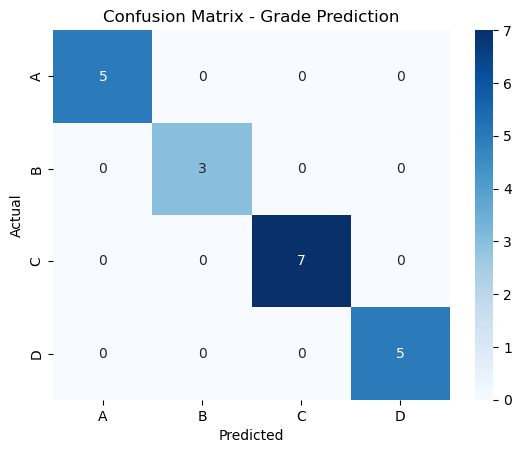

In [28]:
cm = confusion_matrix(y_test, y_pred, labels=["A", "B", "C", "D"])
print(cm)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["A", "B", "C", "D"], yticklabels=["A", "B", "C", "D"], cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Grade Prediction")
plt.show()

In [29]:
y_test

83    D
53    B
70    D
45    A
44    C
39    C
22    D
80    D
10    C
0     A
18    A
30    A
73    C
33    D
90    B
4     B
76    C
77    C
12    A
31    C
Name: Grade, dtype: object

In [30]:
y_pred

array(['D', 'B', 'D', 'A', 'C', 'C', 'D', 'D', 'C', 'A', 'A', 'A', 'C',
       'D', 'B', 'B', 'C', 'C', 'A', 'C'], dtype=object)